# Delivering your final presentation

***

## Project Description

You are a consultant working with a small startup airline, operating out of the Chicago, Illinois area in the United States. The airline's management team has a strong airline operations background, but don’t have much financial or data analytics experience. Many of their systems are disparate and not connected. You were shocked to find out that until just recently, the airline could not pull specific aircraft details, such as route and seating capacity, from a single report, but rather needed to open two or more files and compare the information.   The airline has recently been able to connect their data sources and have put together charts and graphs using the data.  The company needs your help interpreting the data to make some big strategic decisions to grow and position themselves in the market. 

The CEO has asked you to review the data and present your findings during a 10 minute presentation on the following key issues:  

- Where are they losing the most money? (Hint:  review revenue by flight route, as well as fuel costs per miles based on aircraft type, flights with the lowest total revenue, flights with the lowest average ticket price)

- Where are they most profitable? (Hint:  review flights with the highest total revenue, revenue by flight route, flights with the highest average ticket price) 

- Should they add a Chicago to Atlanta route in order to increase profits? (Hint:  review the potential new route tab in the spreadsheet)

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats
from collections import Counter


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
aircraftdf = pd.read_csv("aircraft.csv")
aircraftdf.head()

,AircraftID,AircraftType,SeatCapacity,FuelCostperSeatMile (Cents)
0,1,B737,185,2.08
1,2,B737,185,2.08
2,3,B737,185,2.08
3,4,B737,185,2.08
4,5,B737,185,2.08


In [3]:
air = pd.DataFrame(aircraftdf.groupby("AircraftType")["FuelCostperSeatMile (Cents)"].sum())
air

,FuelCostperSeatMile (Cents)
AircraftType,
A319,164.26
A320,56.56
B737,201.76


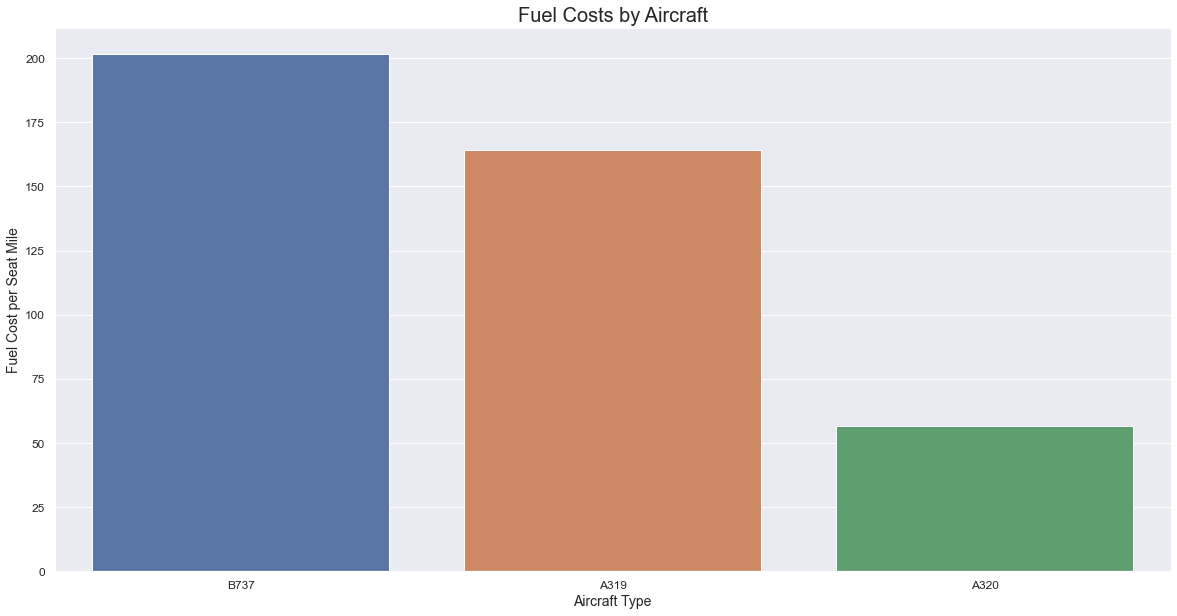

In [4]:
fig = plt.figure(figsize=(20,10))


sns.barplot(x=air.index, y=air["FuelCostperSeatMile (Cents)"], data=air,
            order=air.sort_values('FuelCostperSeatMile (Cents)', ascending=False).index)
plt.title("Fuel Costs by Aircraft", size=20)
plt.xlabel("Aircraft Type")
plt.ylabel("Fuel Cost per Seat Mile")
plt.show()

In [5]:
airportsdf = pd.read_csv("airports.csv")
airportsdf.head()

,AirportID,AirportName,Gates (number of available)
0,ATL,Hartsfield-Jackson Atlanta International,100
1,LAX,Los Angeles International,86
2,ORD,Chicago O'Hare International,110
3,DFW,Dallas/Fort Worth International,130
4,JFK,John F Kennedy International,120


In [6]:
flightsdf = pd.read_csv("flights.csv")
flightsdf.head()

,FlightID,Date,RouteID,Departure Delay,AircraftID,Scheduled Departure,Avg Ticket Price,Total Fare,Flight Month,Flight Year
0,Flight1,41972,ORD-BOS,3.90,43,6:00:00 PM,450.00,74250,11,2014
1,Flight2,41967,ORD-JFK,6.80,61,7:00:00 PM,375.00,61875,11,2014
2,Flight3,42238,ORD-EWR,2.70,72,5:00:00 PM,247.50,44798,8,2015
3,Flight4,41833,ORD-LAX,3.80,172,5:30:00 PM,385.00,63525,7,2014
4,Flight5,42135,ORD-IAH,3.00,89,5:00:00 PM,200.00,36200,5,2015


In [7]:
flightsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9636 entries, 0 to 9635
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FlightID             9636 non-null   object 
 1   Date                 9636 non-null   int64  
 2   RouteID              9636 non-null   object 
 3   Departure Delay      9636 non-null   float64
 4   AircraftID           9636 non-null   int64  
 5   Scheduled Departure  9636 non-null   object 
 6   Avg Ticket Price     9636 non-null   float64
 7   Total Fare           9636 non-null   int64  
 8   Flight Month         9636 non-null   int64  
 9   Flight Year          9636 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 752.9+ KB


In [8]:
meanprice = pd.DataFrame(flightsdf.groupby("RouteID")["Avg Ticket Price"].mean())
meanprice

,Avg Ticket Price
RouteID,
ORD-ATL,214.09
ORD-BOS,321.05
ORD-BWI,253.85
ORD-CLT,133.73
ORD-DCA,5145.83
ORD-DEN,322.57
ORD-DFW,212.09
ORD-DTW,122.09
ORD-EWR,240.07


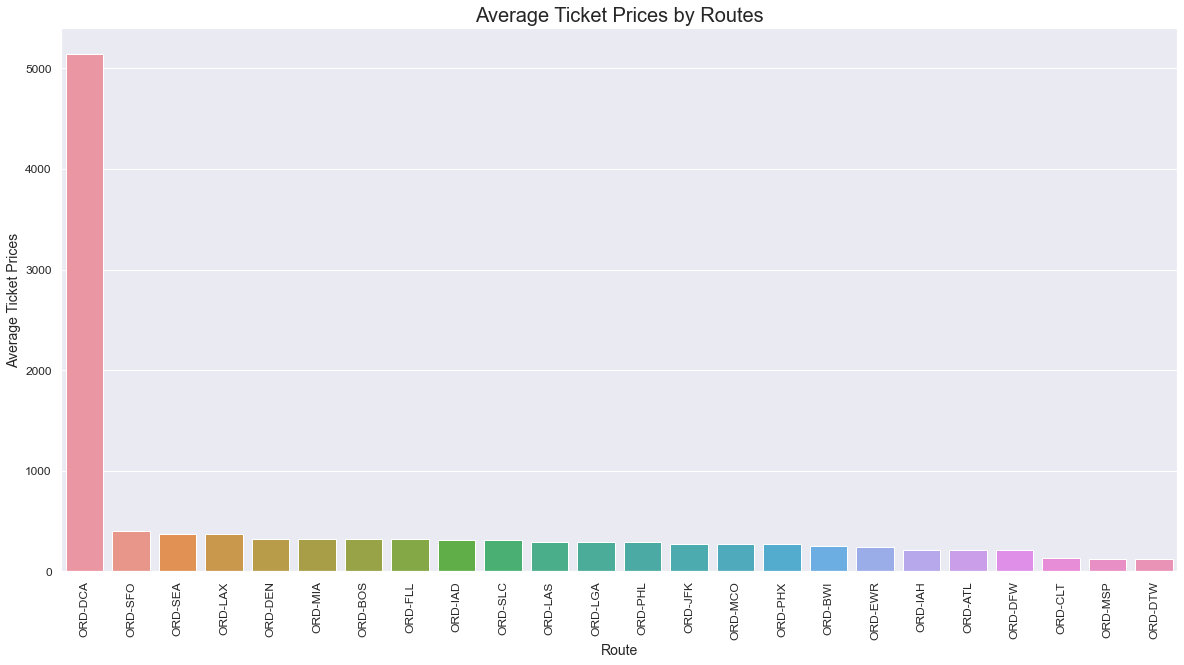

In [9]:
fig = plt.figure(figsize=(20,10))


sns.barplot(x=meanprice.index, y=meanprice["Avg Ticket Price"], data=meanprice,
            order=meanprice.sort_values('Avg Ticket Price', ascending=False).index)
plt.title("Average Ticket Prices by Routes", size=20)
plt.xlabel("Route")
plt.ylabel("Average Ticket Prices")
plt.xticks(rotation=90)
plt.show()

In [10]:
flight_counts = pd.DataFrame(flightsdf.groupby("RouteID")["FlightID"].count())
flight_counts

,FlightID
RouteID,
ORD-ATL,762
ORD-BOS,315
ORD-BWI,104
ORD-CLT,570
ORD-DCA,24
ORD-DEN,614
ORD-DFW,716
ORD-DTW,279
ORD-EWR,406


In [11]:
len(flight_counts)

24

In [12]:
ticketprice = pd.DataFrame(flightsdf.groupby("RouteID")["Avg Ticket Price"].mean())
ticketprice

,Avg Ticket Price
RouteID,
ORD-ATL,214.09
ORD-BOS,321.05
ORD-BWI,253.85
ORD-CLT,133.73
ORD-DCA,5145.83
ORD-DEN,322.57
ORD-DFW,212.09
ORD-DTW,122.09
ORD-EWR,240.07


In [13]:
ticketprice.describe()

,Avg Ticket Price
count,24.00
mean,474.99
std,997.66
min,122.09
25%,233.74
50%,292.47
75%,321.13
max,5145.83


In [14]:
len(ticketprice)

24

In [15]:
combinedf = pd.concat([flight_counts,ticketprice], axis=1)

In [16]:
combinedf

,FlightID,Avg Ticket Price
RouteID,,
ORD-ATL,762,214.09
ORD-BOS,315,321.05
ORD-BWI,104,253.85
ORD-CLT,570,133.73
ORD-DCA,24,5145.83
ORD-DEN,614,322.57
ORD-DFW,716,212.09
ORD-DTW,279,122.09
ORD-EWR,406,240.07


In [17]:
combinedf["Revenue"] = combinedf["FlightID"] * combinedf["Avg Ticket Price"]

In [18]:
combinedf

,FlightID,Avg Ticket Price,Revenue
RouteID,,,
ORD-ATL,762,214.09,163140.00
ORD-BOS,315,321.05,101130.00
ORD-BWI,104,253.85,26400.00
ORD-CLT,570,133.73,76225.00
ORD-DCA,24,5145.83,123500.00
ORD-DEN,614,322.57,198060.00
ORD-DFW,716,212.09,151860.00
ORD-DTW,279,122.09,34063.00
ORD-EWR,406,240.07,97470.00


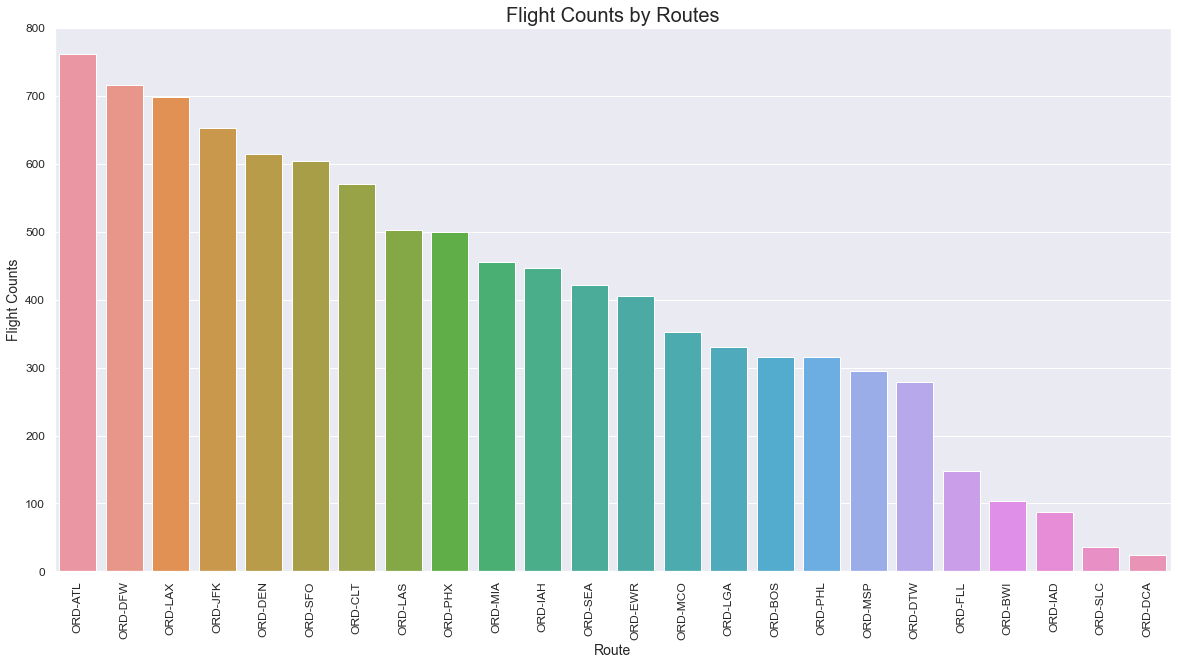

In [19]:
fig = plt.figure(figsize=(20,10))


sns.barplot(x=combinedf.index, y=combinedf["FlightID"], data=combinedf,
            order=combinedf.sort_values('FlightID', ascending=False).index)
plt.title("Flight Counts by Routes", size=20)
plt.xlabel("Route")
plt.ylabel("Flight Counts")
plt.xticks(rotation=90)
plt.show()

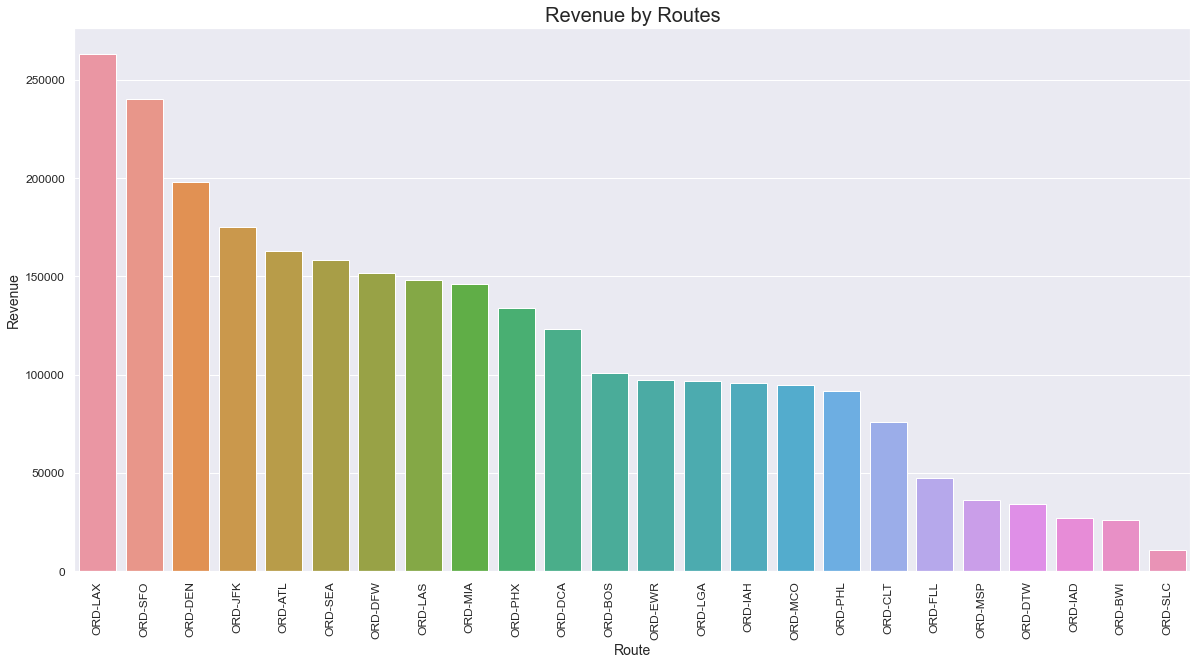

In [20]:
fig = plt.figure(figsize=(20,10))


sns.barplot(x=combinedf.index, y=combinedf["Revenue"], data=combinedf,
            order=combinedf.sort_values('Revenue', ascending=False).index)
plt.title("Revenue by Routes", size=20)
plt.xlabel("Route")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.show()

In [21]:
combinedf.reset_index(inplace=True)

In [22]:
combinedf.head()

,RouteID,FlightID,Avg Ticket Price,Revenue
0,ORD-ATL,762,214.09,163140.00
1,ORD-BOS,315,321.05,101130.00
2,ORD-BWI,104,253.85,26400.00
3,ORD-CLT,570,133.73,76225.00
4,ORD-DCA,24,5145.83,123500.00


In [23]:
routesdf = pd.read_csv("routes.csv")
routesdf.head()

,RouteID,DepAirport,AirportID,Distance,ListPrice
0,ORD-ATL,ORD,ATL,510,200.00
1,ORD-LAX,ORD,LAX,1518,350.00
2,ORD-DFW,ORD,DFW,700,200.00
3,ORD-JFK,ORD,JFK,619,250.00
4,ORD-DEN,ORD,DEN,800,300.00


In [24]:
routesdf.describe(include='all')

,RouteID,DepAirport,AirportID,Distance,ListPrice
count,24,24,24,24.00,24.00
unique,24,1,24,NaN,NaN
top,ORD-ATL,ORD,ATL,NaN,NaN
freq,1,24,1,NaN,NaN
mean,NaN,NaN,NaN,812.17,452.50
std,NaN,NaN,NaN,365.34,971.11
min,NaN,NaN,NaN,200.00,115.00
25%,NaN,NaN,NaN,595.00,218.75
50%,NaN,NaN,NaN,715.00,275.00
75%,NaN,NaN,NaN,1000.00,300.00


In [25]:
combinedf2 = pd.merge(left=combinedf,right=routesdf,on='RouteID')
combinedf2

,RouteID,FlightID,Avg Ticket Price,Revenue,DepAirport,AirportID,Distance,ListPrice
0,ORD-ATL,762,214.09,163140.00,ORD,ATL,510,200.00
1,ORD-BOS,315,321.05,101130.00,ORD,BOS,730,300.00
2,ORD-BWI,104,253.85,26400.00,ORD,BWI,520,240.00
3,ORD-CLT,570,133.73,76225.00,ORD,CLT,700,125.00
4,ORD-DCA,24,5145.83,123500.00,ORD,DCA,600,5000.00
5,ORD-DEN,614,322.57,198060.00,ORD,DEN,800,300.00
6,ORD-DFW,716,212.09,151860.00,ORD,DFW,700,200.00
7,ORD-DTW,279,122.09,34063.00,ORD,DTW,200,115.00
8,ORD-EWR,406,240.07,97470.00,ORD,EWR,600,225.00
9,ORD-FLL,148,319.86,47340.00,ORD,FLL,940,300.00


In [26]:
combinedf2["Rev/Dist"] = combinedf2["Revenue"]/combinedf2["Distance"]

In [27]:
combinedf2

,RouteID,FlightID,Avg Ticket Price,Revenue,DepAirport,AirportID,Distance,ListPrice,Rev/Dist
0,ORD-ATL,762,214.09,163140.00,ORD,ATL,510,200.00,319.88
1,ORD-BOS,315,321.05,101130.00,ORD,BOS,730,300.00,138.53
2,ORD-BWI,104,253.85,26400.00,ORD,BWI,520,240.00,50.77
3,ORD-CLT,570,133.73,76225.00,ORD,CLT,700,125.00,108.89
4,ORD-DCA,24,5145.83,123500.00,ORD,DCA,600,5000.00,205.83
5,ORD-DEN,614,322.57,198060.00,ORD,DEN,800,300.00,247.57
6,ORD-DFW,716,212.09,151860.00,ORD,DFW,700,200.00,216.94
7,ORD-DTW,279,122.09,34063.00,ORD,DTW,200,115.00,170.31
8,ORD-EWR,406,240.07,97470.00,ORD,EWR,600,225.00,162.45
9,ORD-FLL,148,319.86,47340.00,ORD,FLL,940,300.00,50.36


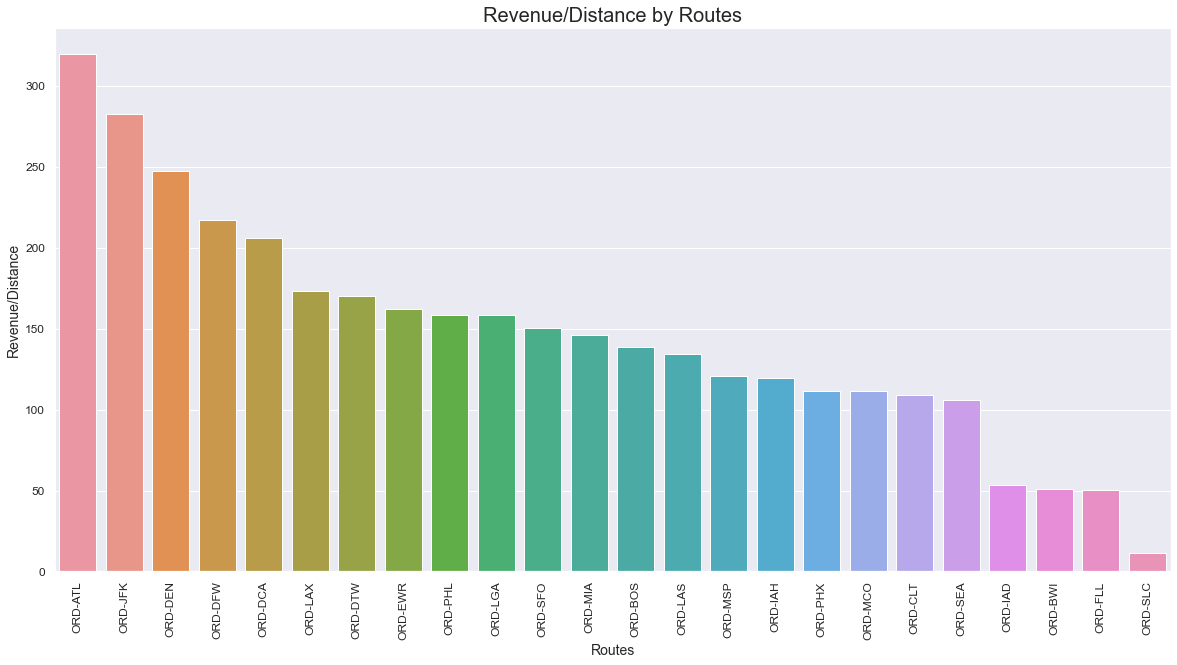

In [28]:
fig = plt.figure(figsize=(20,10))


sns.barplot(x=combinedf2["RouteID"], y=combinedf2["Rev/Dist"], data=combinedf2,
            order=combinedf2.sort_values('Rev/Dist', ascending=False).RouteID)
plt.title("Revenue/Distance by Routes", size=20)
plt.xlabel("Routes")
plt.ylabel("Revenue/Distance")
plt.xticks(rotation=90)
plt.show()

### Save to CSV

In [29]:
#combinedf2.to_csv("combo2.csv", index=False)

#### Python code done by Dennis Lam